In [1]:
import numpy as np
import scipy as sp
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import logistic
from scipy import special
from scipy.stats import uniform

from pykrige.ok import OrdinaryKriging
from pykrige.uk import UniversalKriging

import matplotlib.pyplot as plt

from libpysal.weights import lat2W
from esda.moran import Moran

from scipy.interpolate import NearestNDInterpolator


d:\PROGRAMY\Anaconda\lib\site-packages\libpysal\weights\util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [2]:
x_size = y_size = 160

x_coord = np.linspace(0, x_size-1, x_size)
y_coord = np.linspace(0, y_size-1, y_size)

x_grid, y_grid = np.meshgrid(x_coord, y_coord)

x_feature = x_grid.flatten().reshape(-1, 1)
y_feature = y_grid.flatten().reshape(-1, 1)

gridx = gridy = np.arange(0, x_size, 1).astype('float')

surface_value_min, surface_value_max = 1, 2


In [3]:
def scaler(data, min_v, max_v):

    return min_v+(((data-data.min())*(max_v-min_v))/(data.max()-data.min()))


#### Trend None

In [4]:
trend_none = np.full(shape=(x_size, y_size), fill_value=1)
trend_none = trend_none.flatten()

#### Trend Linear

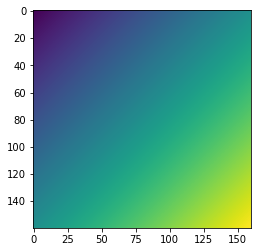

In [5]:
trend_linear = x_grid+y_grid
trend_linear = scaler(trend_linear.flatten(), surface_value_min, surface_value_max)

plt.imshow(trend_linear.reshape((x_size, y_size)))

#### Trend Non-linear

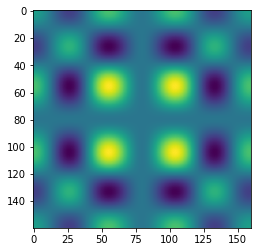

In [6]:
deg = 2

x_grid_sc = scaler(
    x_grid.flatten().reshape(-1, 1).reshape(y_size, x_size), -10, 10)
y_grid_sc = scaler(
    y_grid.flatten().reshape(-1, 1).reshape(y_size, x_size), -10, 10)

x_coef = special.jv(deg, x_grid_sc)
y_coef = special.jv(deg, y_grid_sc)

trend_nonlinear = x_coef*y_coef
trend_nonlinear = scaler(trend_nonlinear.flatten(), surface_value_min, surface_value_max)

plt.imshow(trend_nonlinear.reshape((x_size, y_size)))

In [6]:
np.savetxt("data_surface\\trend_nonlinear.csv", trend_nonlinear, delimiter=",")

#### Trend Random Continuous

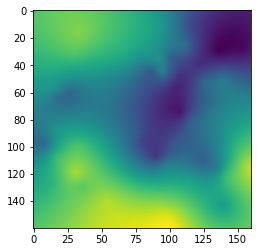

In [9]:
s = 55

x_f = uniform.rvs(0, x_size, size=s)
y_f = uniform.rvs(0, y_size, size=s)
z_f = uniform.rvs(-1, 2, size=s)

model_type = 'linear'
param = {'slope': 1, 'nugget': 50}

model = OrdinaryKriging(x_f.astype('float'), y_f.astype(
    'float'), z_f, model_type, param)
values, placeholder = model.execute("grid", gridx, gridy)

trend_random_con = scaler(values.data.flatten(), surface_value_min, surface_value_max)

plt.imshow(trend_random_con.reshape((x_size, y_size)))

#### Trend Random Discreete

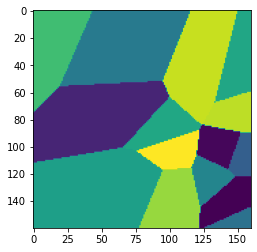

In [13]:
from scipy.stats import logistic


X, Y = np.meshgrid(gridx, gridy)  # 2D grid for interpolation

s = 15

x_f = scaler(logistic.rvs(1, x_size, size=s), 0, 160)
y_f = scaler(logistic.rvs(1, x_size, size=s), 0, 160)
z_f = uniform.rvs(-1, 2, size=s)

interp = NearestNDInterpolator(list(zip(x_f, y_f)), z_f)
trend_random_dis = interp(X, Y)
trend_random_dis = scaler(trend_random_dis.flatten(), surface_value_min, surface_value_max)

plt.imshow(trend_random_dis.reshape((x_size, y_size)))

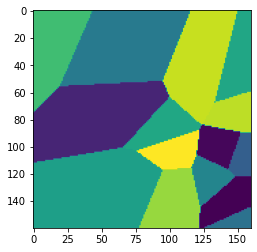

In [14]:
plt.imshow(trend_random_dis.reshape((x_size, y_size)))

In [ ]:
np.savetxt("data_surface\\trend_random_dis.csv", trend_random_dis, delimiter=",")

In [16]:
np.savetxt("data_surface\\trend_none.csv", trend_none, delimiter=",")
np.savetxt("data_surface\\trend_linear.csv", trend_linear, delimiter=",")
np.savetxt("data_surface\\trend_nonlinear.csv", trend_nonlinear, delimiter=",")
np.savetxt("data_surface\\trend_random_con.csv", trend_random_con, delimiter=",")
np.savetxt("data_surface\\trend_random_dis.csv", trend_random_dis, delimiter=",")